# Quiz 1

Sergei Mikhailovich Prokudin-Gorskii (1863-1944), a pioneering photographer extensively traveled the Russian Empire from 1909 to 1915, capturing thousands of images. Employing an early color technology, he recorded three images of each scene onto glass plates using red, green, and blue filters. 

Your task is to take Gorskii glass plate RGB color channels and produce a color image with as few visual artifacts as possible (ignore the artifacts at the image boundaries). To do this, you will need to read the image file, extract the three color channel images, place them on top of each other, and align them so that they form a single RGB color image. You will need to implement this in Python.

**Note** that the channel order for all files from top to bottom is BGR, not RGB!

In [1]:
import cv2 as cv
from matplotlib import pyplot as plt 
import numpy as np

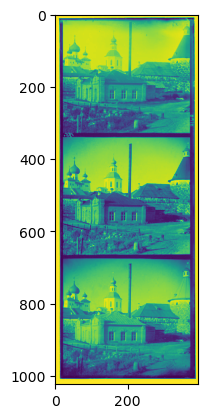

In [59]:
ausid = 87725 # use last five digits of your ausid, e.g 83452
if ausid % 3 == 0: filename = '00153v.jpg'
if ausid % 3 == 1: filename = '00149v.jpg'
if ausid % 3 == 2: filename = '00351v.jpg'
img = cv.imread(filename, cv.IMREAD_GRAYSCALE)
plt.imshow(img)


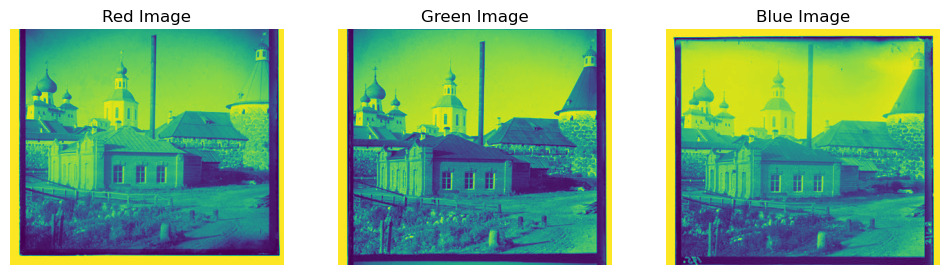

(-0.5, 395.5, 340.5, -0.5)

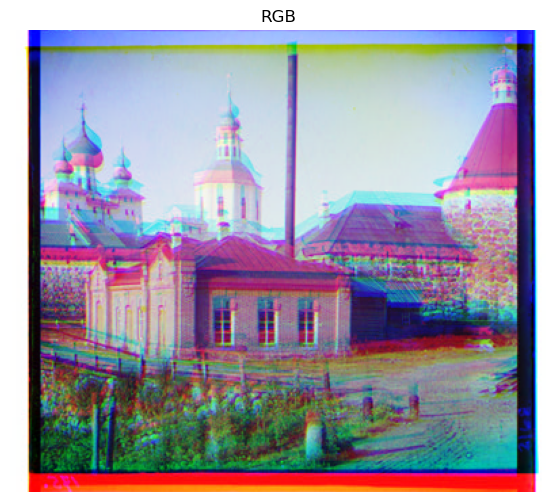

In [4]:
# Step 1 [5 points]: Read the image, extract the Blue, Green and Red channels, stack the channels and display using matplotlib
# TODO: YOUR CODE

height, width = img.shape
third_height = int(height//3)

b = img[:third_height, :]
twothird_height = int(2*third_height)
g = img[third_height:twothird_height, :]
r = img[twothird_height:-1,:]

b = b[:,:,np.newaxis].astype(np.uint8)
g = g[:,:,np.newaxis].astype(np.uint8)
r = r[:,:,np.newaxis].astype(np.uint8)

plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.imshow(r)
plt.title('Red Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(g)
plt.title('Green Image')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(b)
plt.title('Blue Image')
plt.axis('off')
plt.show()

# print(r.shape)
# print(g.shape)
# print(b.shape)
rgb = np.dstack((r,g,b))

plt.figure(figsize=(12,6))
plt.imshow(rgb)
plt.title('RGB')
plt.axis('off')

# When you display the image, you will notice that the color channels are not aligned properly. 

Text(0.5, 1.0, 'Canny Edges B')

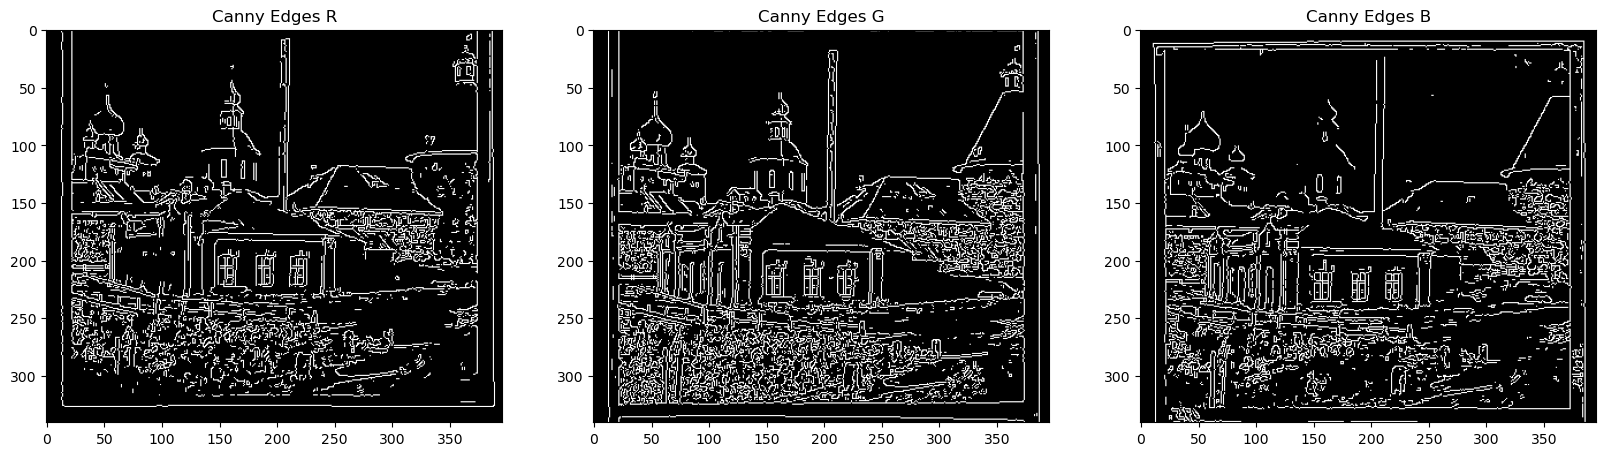

In [26]:
# Step 2: Find the displacement needed to align RGB channels by following the steps below:
#          (1) [3 pts] Use canny edge detector to find the edges 
# TODO: YOUR CODE
edgesr = cv.Canny(r, 150, 180)

# Display the original image and the edges side by side
plt.figure(figsize=(20, 10))
plt.subplot(131), plt.imshow(edgesr, cmap='gray')
plt.title('Canny Edges R')

edgesg = cv.Canny(g, 150, 180)

# Display the original image and the edges side by side
plt.subplot(132), plt.imshow(edgesg, cmap='gray')
plt.title('Canny Edges G')

edgesb = cv.Canny(b, 150, 180)

# Display the original image and the edges side by side
plt.subplot(133), plt.imshow(edgesb, cmap='gray')
plt.title('Canny Edges B')

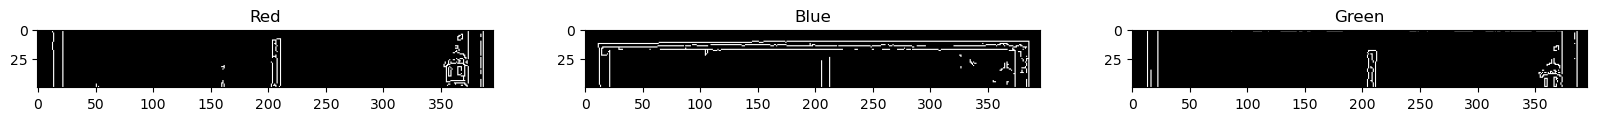

In [58]:
#         (2) [4 pts] Identify horizontal or vertical edges which could help you find the displacement needed 
#             to align the color channels. You can just write your findings here. 
#             No need to show the code for this section
# TODO: YOUR Findings
# 
#
# To see how much I need to shift by, I'll check the pole section of the image using the canny edge detector results
#
plt.figure(figsize=(20, 10))
plt.subplot(131)
plt.title('Red')
plt.imshow(edgesr[:50][:50], cmap='gray')       # red needs to be shifted a bit down 

plt.subplot(132)
plt.title('Blue')
plt.imshow(edgesb[:50][:50], cmap='gray')       # shift blue up 

plt.subplot(133)
plt.title('Green')
plt.imshow(edgesg[:50][:50], cmap='gray')       # shift green up

(-0.5, 395.5, 340.5, -0.5)

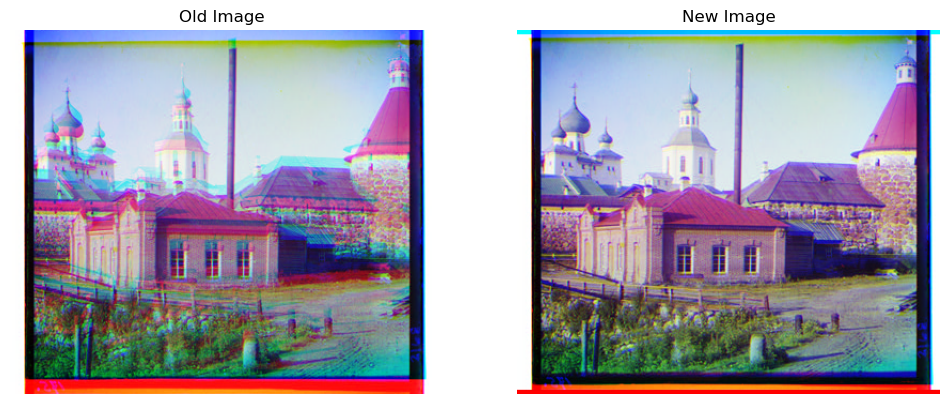

In [56]:
#         (3) [6 pts] Design and apply filters using convolution to align/shift the color channels 
# TODO: YOUR CODE

fr = np.zeros((10,1))
fr[0][0]=1

fb = np.zeros((10,1))
fb[fb.shape[0]-1][0]=1

fg = np.zeros((10,1))
fg[fg.shape[0]-1][0]=1


# Apply the kernel using convolution
#output = np.zeros(image.shape, dtype = np.float32)
new_g = cv.filter2D(src=g, ddepth=-1, kernel=fg, borderType=cv.BORDER_CONSTANT) 
new_b = cv.filter2D(src=b, ddepth=-1, kernel=fb, borderType=cv.BORDER_CONSTANT) 
new_r = cv.filter2D(src=r, ddepth=-1, kernel=fr, borderType=cv.BORDER_CONSTANT) 

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(rgb)
plt.title('Old Image')
plt.axis('off')


#         (4) [2 pts] stacking the channels and display. 
# TODO: YOUR CODE
new_rgb = np.dstack((new_r,new_g,new_b))

plt.subplot(1,2,2)
plt.imshow(new_rgb)
plt.title('New Image')
plt.axis('off')

# Submission

- Submit the completed notebook (this file)
- Copy the cells containing your code and paste them to a word document along with the screen shot of cell output and submit the word document. Keep the font size at 8